In [1]:
#Importando a biblioteca Pandas
import pandas as pd

In [2]:
#leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [3]:
#Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Alterando o tipo de dados da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [ ]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [ ]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df["Vendas"].mean()

122.61180089485438

In [ ]:
#Opções de manipulação de dados

In [ ]:
#Substituir valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [ ]:
#Apagar valores nulos em apenas uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [ ]:
#Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

In [11]:
#Criando a coluna Receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#Retornando a maior receita
df["Receita"].max()

3544.0

In [ ]:
#Retornando a menor receita
df["Receita"].min()

3.34

In [ ]:
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#Agrupando por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


In [ ]:
#Trabalhando com Datas

In [ ]:
#Transformando a coluna de data em tipo inteiro
df["Data"] = df["Data"].view("int64")

In [ ]:
df.dtypes

Cidade     object
Data        int64
Vendas    float64
LojaID      int64
Qtde        int64
dtype: object

In [ ]:
#Transformando a coluna de data em Datetime novamente
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [19]:
#Criar a coluna com o Ano
df["anoVenda"] = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,anoVenda
80,Natal,2018-05-23,264.00,852,3,792.00,2018
134,Recife,2019-03-02,195.18,980,5,975.90,2019
147,Salvador,2019-01-02,34.50,1035,1,34.50,2019
107,Recife,2019-01-01,15.40,980,7,107.80,2019
82,Aracaju,2018-01-01,150.48,1522,4,601.92,2018


In [20]:
#Extraindo mês e dia da venda
df["mesVenda"], df["diaVenda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,anoVenda,mesVenda,diaVenda
58,Aracaju,2018-01-01,37.14,1520,7,259.98,2018,1,1
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2019,1,1
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2
40,Recife,2019-02-13,36.22,983,6,217.32,2019,2,13
58,Salvador,2019-01-01,20.64,1037,2,41.28,2019,1,1


In [ ]:
#Data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
#Calculando difença de dias
df["diferencaDias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,anoVenda,mesVenda,diaVenda,diferencaDias
115,Recife,2019-03-02,12.23,981,3,36.69,2019,3,2,425 days
57,Aracaju,2018-01-01,23.49,1520,7,164.43,2018,1,1,0 days
150,Natal,2019-01-02,11.13,1035,2,22.26,2019,1,2,366 days
143,Natal,2019-01-02,41.18,1037,2,82.36,2019,1,2,366 days
89,Aracaju,2018-01-01,10.15,1523,7,71.05,2018,1,1,0 days


In [ ]:
#Criando a coluna Trimestre
df["Trimestre"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
124,Natal,2019-01-02,44.82,1034,3
118,Natal,2019-01-02,92.21,1035,2
83,Fortaleza,2019-01-01,3.88,1002,6
32,Aracaju,2018-01-01,42.97,1522,6
112,Fortaleza,2019-03-02,133.59,982,1


In [ ]:
#Filtrar as vendas de março de 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde
108,Fortaleza,2019-03-02,152.89,981,4
109,Fortaleza,2019-03-02,18.90,982,6
110,Fortaleza,2019-03-02,51.98,983,6
111,Fortaleza,2019-03-02,8.00,981,3
112,Fortaleza,2019-03-02,133.59,982,1
...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3
138,Salvador,2019-03-02,212.03,1037,3
139,Salvador,2019-03-02,169.01,1036,1
140,Salvador,2019-03-02,20.79,1036,2


In [5]:
#Visualização de dados
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

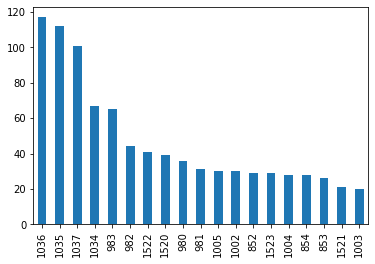

In [7]:
#Grágico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

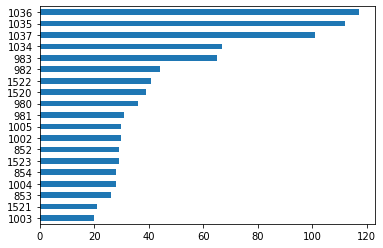

In [9]:
df["LojaID"].value_counts(ascending=True).plot.barh();

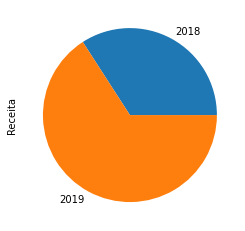

In [12]:
#Gráfico de Pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [13]:
#Total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [14]:
#Adicionando um título e alterando nome dos eixos
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total de vendas')

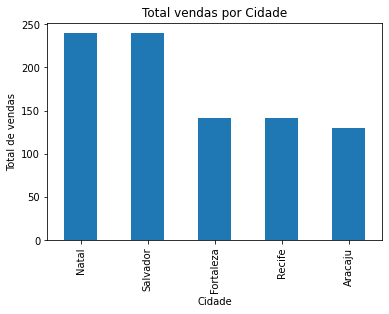

In [16]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade");
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

Text(0, 0.5, 'Total de vendas')

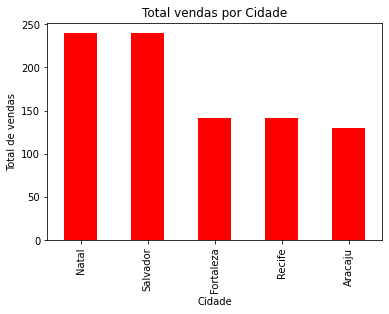

In [17]:
#Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade",color="red");
plt.xlabel("Cidade")
plt.ylabel("Total de vendas")

In [18]:
#Alterando o estilo
plt.style.use("ggplot")

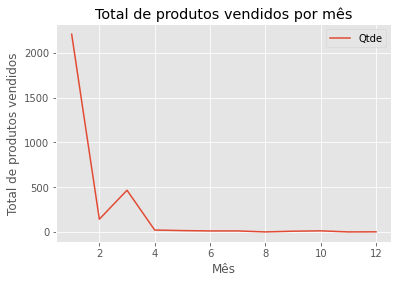

In [24]:
df.groupby(df["mesVenda"])["Qtde"].sum().plot(title="Total de produtos vendidos por mês")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [25]:
df.groupby(["mesVenda"])["Qtde"].sum()

mesVenda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [26]:
#Selecionando apenas as vendas de 2019
df_2019 = df[df["anoVenda"] == 2019]

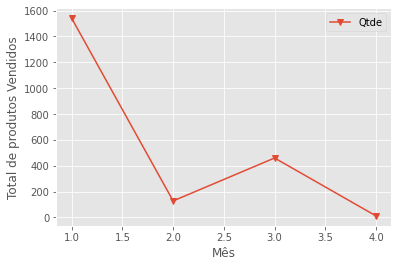

In [29]:
#Total de produtos vendidos por mes em 2019
df_2019.groupby(df_2019["mesVenda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos Vendidos")
plt.legend();

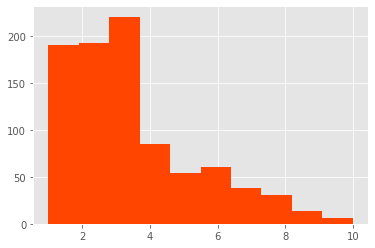

In [31]:
#Histograma
plt.hist(df["Qtde"], color="orangered");

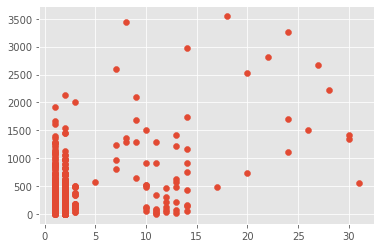

In [32]:
plt.scatter(x=df_2019["diaVenda"], y = df_2019["Receita"]);

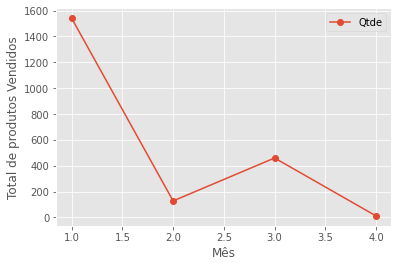

In [34]:
#Salvando em png
df_2019.groupby(df_2019["mesVenda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total de produtos Vendidos")
plt.legend()
plt.savefig("grafico qtde x mês.png");